<a href="https://colab.research.google.com/github/ambassador7982/ambassadorSSA/blob/main/hdf5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt   


In [3]:
# Read H5 file
f = h5.File("NEONDSImagingSpectrometerData.h5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
	print(n)

Reflectance
fwhm
map info
spatialInfo
wavelength


In [4]:
# extract reflectance data from the H5 file
reflectance = f['Reflectance']
# extract one pixel from the data
reflectanceData = reflectance[:,49,392]
reflectanceData = reflectanceData.astype(float)

# divide the data by the scale factor to convert the integer values into floating point values
# note: this information would be accessed from the metadata
scaleFactor = 10000.0
reflectanceData /= scaleFactor
wavelength = f['wavelength']
wavelengthData = wavelength[:]
#transpose the data so wavelength values are in one column
wavelengthData = np.reshape(wavelengthData, 426)
print("Data Description : ", reflectance.attrs['Description'])
print("Data dimensions : ", reflectance.shape, reflectance.attrs['DIMENSION_LABELS'])

Data Description :  b'Atmospherically corrected reflectance.'
Data dimensions :  (426, 502, 477) ['Wavelength' 'Line' 'Sample']


In [5]:
for n in reflectance.attrs:
	print(n)
	# close the h5 file
	f.close()

DIMENSION_LABELS
Description
Scale Factor
Unit
data ignore value
row_col_band


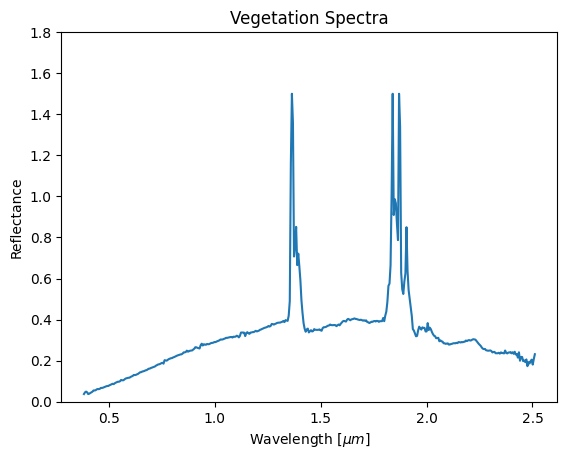

In [9]:
plt.plot(wavelengthData, reflectanceData)
plt.title("Vegetation Spectra")
plt.ylabel('Reflectance')
plt.ylim((0,1.8))
plt.xlabel('Wavelength [$\mu m$]')
plt.show()

In [11]:
f = h5.File("VegetationSpectra.h5", "w")
rdata = f.create_dataset("VegetationSpectra", data=reflectanceData)
attrs = rdata.attrs
attrs.create("Wavelengths", data=wavelengthData)
f.close()